In [1]:
%matplotlib widget
from matplotlib import pyplot as plt, style
import pandas as pd
import numpy as np
import serial

In [2]:
def joystick_positions():
    with serial.Serial("/dev/tty.usbmodem1101", 115200) as ser:
        while True:
            x, y = map(int, ser.readline().decode().split())
            yield x, y

df = pd.DataFrame.from_records(joystick_positions(), nrows=1000, columns=['x', 'y'])

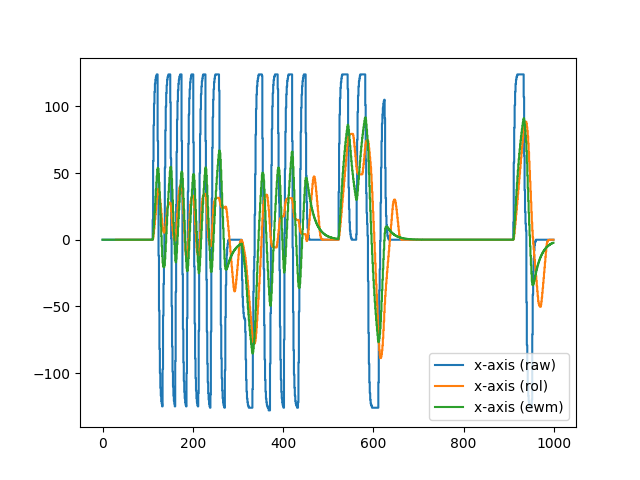

In [4]:
fig, ax = plt.subplots()

def jnorm(vals):
    cvals = vals.subtract(vals.head(32).mean())
    cnvals = cvals                                      \
        .divide(cvals.abs().max())                      \
        .multiply(128)                                  \
        .apply(np.trunc)
    return cnvals

rnorm = jnorm(df)
anorm = rnorm.rolling(32).mean()
enorm = rnorm.ewm(span=32, adjust=False).mean()

def plot_val(which, what, style="steps", x=True, y=True):
    lbl = (f'x-axis ({what})', f'y-axis ({what})')
    if not x:
        lbl = lbl[1]
        which = which.y
    if not y:
        lbl = lbl[0]
        which = which.x
    ax.plot(which, drawstyle=style, label=lbl)

plot_val(rnorm, 'raw', y=False)
plot_val(anorm, 'rol', y=False)
plot_val(enorm, 'ewm', y=False)

# Rolling averages have a lot of delay in general
# and its exaggerated in very fast movements of the joystick
# Exponential moving averages don't, so let's use ewm

ax.legend()